# **Clasificación**

[Victor Sanchez](https://github.com/VicoSan07) <br>
Dataset: [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

### **Objetivo**

Utilizar y analizar los resultados obtenidos a tráves de distintos algoritmos supervisados con el fin de estimar categorías a partir de un conjunto de variables.

### **Carga de Dataset**

In [2]:
import pandas as pd

#Carga de dataset 'vino rojo' 
dfwiner = pd.read_csv(r'C:/Users/vicos/Documents/winequality-red.csv',delimiter=";",
                      #Tipo de datos en cada columna
                      dtype={
                          'fixed acidity': float,
                          'volatile acidity': float,
                          'citric acid': float,
                          'residual sugar': float,
                          'chlorides': float,
                          'free sulfur dioxide': float,
                          'total sulfur dioxide': float,
                          'density': float,
                          'pH': float,
                          'sulphates': float,
                          'alcohol': float,
                          'quality': int,
                      })

#Carga de dataset 'vino blanco' 
dfwinew = pd.read_csv(r'C:/Users/vicos/Documents/winequality-white.csv',delimiter=";",
                      #Tipo de datos en cada columna
                      dtype={
                          'fixed acidity': float,
                          'volatile acidity': float,
                          'citric acid': float,
                          'residual sugar': float,
                          'chlorides': float,
                          'free sulfur dioxide': float,
                          'total sulfur dioxide': float,
                          'density': float,
                          'pH': float,
                          'sulphates': float,
                          'alcohol': float,
                          'quality': int,
                      })

# Crear columnas con string constante en cada fila
dfwiner['type']='red'
dfwinew['type']='white'

dfwineall = pd.concat([dfwiner,dfwinew],ignore_index=True)
dfwineall = dfwineall.drop(columns=["type"])

# Renombramos los nombres de las variables para facilitar su representación visual
dfwineall.rename(
    columns={"fixed acidity": "FA",
            "volatile acidity": "VA",
             "citric acid": "CA",
             "residual sugar": "RS",
             "chlorides": "CH",
             "free sulfur dioxide": "FSD",
             "total sulfur dioxide": "TSD",
             "density": "DE",
             "pH": "PH",
             "sulphates": "SU",
             "alcohol": "AL",
             "quality": "QU"},
    inplace=True,
)

dfwineall

,FA,VA,CA,RS,CH,FSD,TSD,DE,PH,SU,AL,QU
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### **Categorías**

Nuevamente nos enfocaremos en la variable calidad, sin embargo, esta vez dividiremos los datos en 2 categorías con el fin de aplicar técnicas de clasificación a nuestro conjunto de datos. Siendo las clases las siguientes:

- Bueno: Aquellos vinos con una calificación de calidad por encima de 6 
- Malo: Aquellos vinos con una calificación por debajo o igual a 6


In [3]:
#Nueva columna con las categorías
dfwineall['TY'] = 0
dfwineall.loc[dfwineall['QU'] > 5, 'TY'] = 1
dfwineall

,FA,VA,CA,RS,CH,FSD,TSD,DE,PH,SU,AL,QU,TY
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


### **Random Forest**

_Random Forest_ es un algoritmo supervisado que construye árboles de decisión de manera aleatoria, con el objetivo de combinarlos y obtener una predicción más estable y precisa. En lugar de buscar la característica más importante al dividir un nodo, busca la mejor característica entre un subconjunto aleatorio de características.

In [4]:
from sklearn.model_selection import train_test_split

X=dfwineall.iloc[:,:-2]
Y=dfwineall.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X.values,Y.values,test_size=0.2,random_state=0)

In [5]:
# Aplicación Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(X_train,Y_train)

RFC_Y_prediction = RFC.predict(X_test)

### **Decision Trees**

La base de los bosques aleatorios son los árboles de decisión, mismos que de forma aislada también pueden ser utilizados para predecir categorías como veremos a continuación. Suele ser un método más rápido al no tener una gran cantidad de árboles de decisión, como los bosques aleatorios.

In [6]:
# Aplicación Decision Trees
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train,Y_train)

DTC_Y_prediction = DTC.predict(X_test)

### **Resultados**

Una vez aplicado los algoritmos es posible analizar la relevancia de las variables en la predicción de categorías a tráves de la técnica "Importancia de las características" la cual asigna una puntuación a las características en función de su útilidad en el algoritmo

In [7]:
# Feature Importance
FI_RFC = pd.Series(RFC.feature_importances_, index=X.columns).sort_values(ascending=False)
#FI_RFC.rename(index= X.columns, inplace=True)
FI_DTC = pd.Series(DTC.feature_importances_, index=X.columns)
FI_Models = pd.concat([FI_RFC,FI_DTC],axis=1)
FI_Models.rename(columns={0: "RFC", 1: "DTC"},inplace=True)

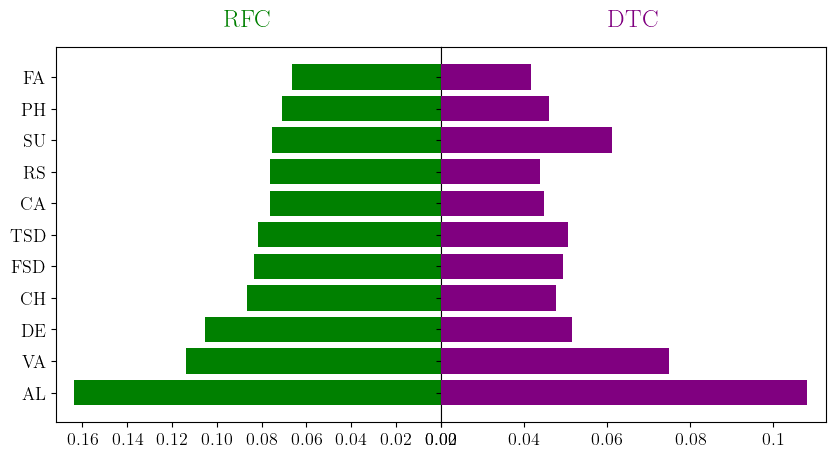

In [11]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Gráfico
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(FI_Models.index, FI_Models['RFC'], align='center', color='green', zorder=10)
axes[0].set_title('RFC', fontsize=18, pad=15, color='green', **{'fontname':'Calibri'})
axes[1].barh(FI_Models.index, FI_Models['DTC'], align='center', color='purple', zorder=10)
axes[1].set_title('DTC', fontsize=18, pad=15, color='purple', **{'fontname':'Calibri'})
axes[0].invert_xaxis() 

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, **{'fontname':'Calibri'})
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, **{'fontname':'Calibri'})


axes[1].set_xticklabels([0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, **{'fontname':'Calibri'})
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, **{'fontname':'Calibri'})

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
#plt.savefig('FeatureImportance_Wine.png',dpi=200)
plt.show()

En ambos modelos, el alcohol representa la característica más importante

### **Conclusiones**

Es interesante observar las posturas tomadas por ambos modelos, el bosque aleatorio toma como segunda y tercera variable más relevante la acidez y la densidad del vino, lo cuál es lógico considerando que el porcentaje de agua en el vino diluye el alcohol y otros componentes. Por otra parte, el modelo de árboles de decisión sigue un camino similar.